In [2]:
from ultralytics import YOLO
from PIL import Image

In [3]:
model_path = "/home/eirikmv/cv_project2/runs/run1/weights/best.pt"
model = YOLO(model_path)


0: 160x640 1 2, 1 y, 1 \\left(, 1 \\right), 1 \\sin, 3.9ms
Speed: 2.3ms preprocess, 3.9ms inference, 0.9ms postprocess per image at shape (1, 3, 160, 640)


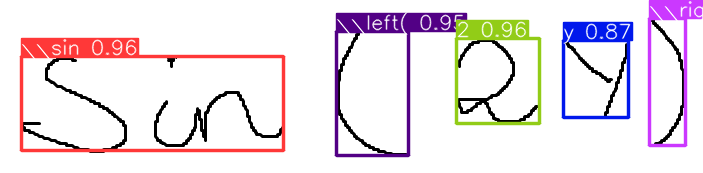

In [7]:
img = Image.open("/home/eirikmv/cv_project2/test_imgs/math_3.png")

result = model.predict(source=img, conf=0.5)[0]

im_array = result.plot()  
im = Image.fromarray(im_array[..., ::-1])

display(im)

(173, 703, 3)

In [5]:
img_array = result.orig_img

imgs = []
for res in result:

    box = res.boxes.xyxy[0].cpu().numpy().astype(int)

    img = img_array[box[1]:box[3], box[0]:box[2]]
    imgs.append([img, box])
    

# sort the images by the x coordinate
imgs = sorted(imgs, key=lambda x: x[1][0])

# display the images
for img, box in imgs:
    im = Image.fromarray(img)
    
    im.save(f"/home/eirikmv/cv_project2/test_imgs/{box[0]}_{box[1]}.png")